In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from tqdm import tqdm

## Get Similarity Score

In [234]:
arcface_dt = pd.read_csv('./arcface_embedding.csv')
# faceid_dt = pd.read_csv('./faceid_embedding.csv')

In [235]:
drop =[ 10021,  10402,  10547,  10621,  10698,  10756,   1099,  11093,
        11296,   1158,  11794,  11806,  11808,  11825,  11837,  11858,
        11860,  11878,  11898,  11904,  11918,  11936,  11954,  11969,
        11971,  11990, 125474, 127826,   1432,   1441, 145726, 153796,
         1550, 158014,  17048, 172237,   1789,   1840,   1983,   2037,
         2175,   2180,  24136,   2417,   2569, 264137, 264708,   2854,
        29677, 311129,  31240, 316614,  32161, 324684, 326527,  32774,
       347518,   3564, 360249,  36036,  36123]

In [236]:
arcface_dt[arcface_dt['fid'].isin(drop)]

fid                      filename  vector_0  vector_1  vector_2  \
117    10021   210403000023704_1_26525.jpg  0.029258  0.055009  0.033473   
118    10021   210403000023704_3_26536.jpg -0.028368 -0.004808 -0.083168   
119    10021   210403000024150_1_26946.jpg  0.033185  0.074998  0.014589   
120    10021   210403000024150_1_26967.jpg  0.066478  0.058808 -0.022780   
121    10021   210403000024150_3_26975.jpg  0.002526  0.011082 -0.091843   
...      ...                           ...       ...       ...       ...   
62679  36123  210409000101562_1_110997.jpg  0.005514  0.043661  0.013402   
62680  36123  210409000101562_3_111015.jpg  0.000841 -0.015931  0.012678   
62681  36123  210409000101562_3_111025.jpg  0.036194  0.022567  0.072130   
62682  36123  210409000101562_3_111027.jpg  0.001663  0.050775  0.024145   
62683  36123  210409000101562_3_111044.jpg  0.021445 -0.001389 -0.001801   

       vector_3  vector_4  vector_5  vector_6  vector_7  ...  vector_503  \
117    0.005724 -0.007642 -0.003782  0.003666  0.031431  ...    0.017795   
118    0.005714  0.028737  0.011359 -0.002709  0.032909  ...   -0.035800   
119   -0.038933  0.022659  0.020470  0.027011  0.033192  ...   -0.003195   
120   -0.029174  0.035750  0.019355  0.010078 -0.019542  ...    0.007237   
121    0.034308  0.046428  0.022377 -0.023979  0.053170  ...   -0.007371   
...         ...       ...       ...       ...       ...  ...         ...   
62679 -0.003818 -0.062981  0.043861  0.027523 -0.023591  ...    0.029656   
62680 -0.058680  0.052146  0.075185  0.086063 -0.012319  ...    0.018582   
62681 -0.013010 -0.045908  0.044120  0.020031  0.015897  ...    0.003090   
62682  0.039070 -0.001954  0.078276  0.019716  0.041851  ...    0.036681   
62683  0.060092  0.009812  0.029085  0.002682 -0.038277  ...   -0.041722   

       vector_504  vector_505  vector_506  vector_507  vector_508  vector_509  \
117      0.068963   -0.072767   -0.002702    0.023796    0.045152   -0.023388   
118      0.064602   -0.012111   -0.027128   -0.015276   -0.015619   -0.022235   
119      0.031033   -0.065621    0.029791    0.053958    0.024848   -0.024699   
120      0.064364   -0.037668    0.028187    0.048234    0.026426   -0.009490   
121      0.087348   -0.022536   -0.046269   -0.026842   -0.021417   -0.010179   
...           ...         ...         ...         ...         ...         ...   
62679    0.012709    0.024963   -0.027344    0.134334   -0.015374   -0.012431   
62680   -0.001289    0.000867    0.006028    0.017719   -0.030683   -0.071592   
62681    0.002593    0.065560   -0.024701    0.110895   -0.031348    0.005925   
62682   -0.024235    0.055665   -0.052349    0.059599    0.012002    0.012846   
62683   -0.028588   -0.052594    0.067914    0.042407   -0.019378    0.023600   

       vector_510  vector_511  image_type  
117     -0.054012   -0.032357          id  
118     -0.025772   -0.052918      selfie  
119     -0.119849   -0.017038          id  
120     -0.094402   -0.005470          id  
121      0.002662   -0.009775      selfie  
...           ...         ...         ...  
62679    0.015025   -0.007009          id  
62680   -0.019940    0.046424      selfie  
62681   -0.015481   -0.002213      selfie  
62682   -0.087392   -0.000984      selfie  
62683    0.016096    0.014159      selfie  

[1776 rows x 515 columns]

In [174]:
arcface_dt = arcface_dt[~arcface_dt['fid'].isin(drop)]

In [175]:
len(arcface_dt)

108296

In [163]:
arcface_id = arcface_dt[['fid']+[f'vector_{i}' for i in range(512)]].reset_index(drop = True)
# faceid_id = faceid_dt[faceid_dt['image_type'] == 'id'][['fid']+[f'vector_{i}' for i in range(512)]].reset_index(drop = True)

In [164]:
list_fid = sorted(list(arcface_id.fid.unique()[:5000]))

In [165]:
arc_con = arcface_id[arcface_id['fid'].isin(list_fid)]

In [169]:
f = open("arcface_id_score_2.txt", "a")
f.writelines("fid_1,fid_2,score\n")
f.close()
for i in tqdm(range(len(arc_con)-100)):
    vector = np.array([arc_con[f'vector_{j}'][i] for j in range(512)])
    for k in range(i+1, i + 20): #because the 
        vector_1 = np.array([arc_con[f'vector_{j}'][k] for j in range(512)])
        score = np.sum(np.square(vector - vector_1))
        f = open("arcface_id_score_2.txt", "a")
        f.writelines([str(arc_con['fid'][i]),',', str(arc_con['fid'][k]),',', str(score), '\n'])
        f.close()

100%|██████████| 67469/67469 [59:46<00:00, 18.81it/s] 


In [277]:
df = pd.read_csv('/mnt/HDD/home-users/trambtn/new_embedd/arcface_id_score_2.txt', sep = ',')
df = df[~df['fid_1'].isin(drop)][~df['fid_2'].isin(drop)].reset_index(drop = True)
df['score'] = df['score'].apply(lambda x: float(x))

true_pairs = df[df['fid_1'] == df['fid_2']][df['score'] != 0].reset_index(drop = True)
false_pairs = df[df['fid_1'] != df['fid_2']]

false_pairs = false_pairs.iloc[:,:10000]

cons = pd.concat([true_pairs, false_pairs], ignore_index=True)

<ipython-input-277-0c80c78b0c27>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~df['fid_1'].isin(drop)][~df['fid_2'].isin(drop)].reset_index(drop = True)
<ipython-input-277-0c80c78b0c27>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_pairs = df[df['fid_1'] == df['fid_2']][df['score'] != 0].reset_index(drop = True)


In [547]:
false_pairs[false_pairs['score'] <= 1.22]

Empty DataFrame
Columns: [fid_1, fid_2, score]
Index: []

In [538]:
true_pairs[true_pairs['fid_1'] == 36922]

fid_1  fid_2     score
483895  36922  36922  0.751585
483896  36922  36922  1.584637
483897  36922  36922  1.465291
483898  36922  36922  0.809378
483899  36922  36922  1.227884
483900  36922  36922  1.227884
483901  36922  36922  0.751585
483902  36922  36922  1.584637
483903  36922  36922  1.465291
483904  36922  36922  0.809378
483905  36922  36922  1.227884
483906  36922  36922  1.227884
483907  36922  36922  0.751585
483908  36922  36922  1.584637
483909  36922  36922  1.465291
483910  36922  36922  0.809378
483911  36922  36922  1.227884
483912  36922  36922  1.227884
483913  36922  36922  1.239357
483914  36922  36922  1.077023
483915  36922  36922  0.365236
483916  36922  36922  0.781094
483917  36922  36922  0.781094
483918  36922  36922  0.587434
483919  36922  36922  1.206100
483920  36922  36922  0.862514
483921  36922  36922  0.862514
483922  36922  36922  0.954388
483923  36922  36922  0.550005
483924  36922  36922  0.550005
483925  36922  36922  0.744550
483926  36922  36922  0.744550

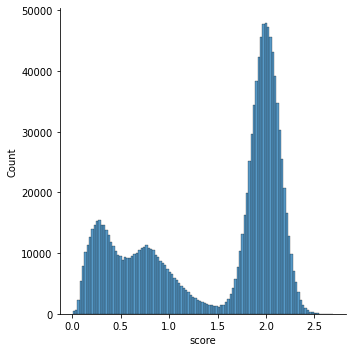

In [178]:
sns.displot(cons['score'])

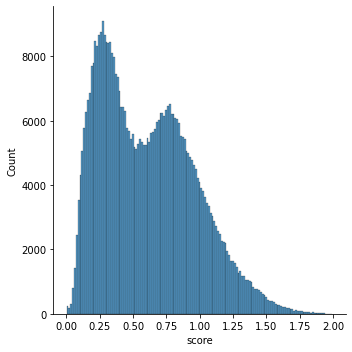

In [179]:
sns.displot(true_pairs['score'])

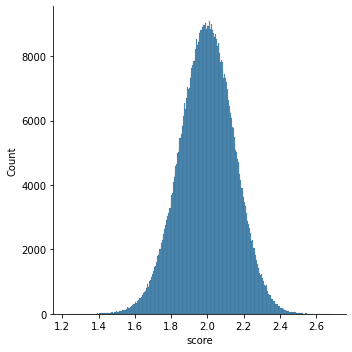

In [46]:
sns.displot(false_pairs['score'])

In [45]:
min(true_pairs['score'])

0.0017981928027271915

In [48]:
sns.boxplot(true_pairs['score'])

/mnt/HDD/home-users/trambtn/miniconda3/envs/tf14/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

In [51]:
sns.boxplot(false_pairs['score'])

/mnt/HDD/home-users/trambtn/miniconda3/envs/tf14/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

In [113]:
false_pairs.reset_index(drop = True, inplace=True)

In [114]:
false_pairs['score']

0         2.037531
1         1.952773
2         1.900194
3         1.918286
4         1.969607
            ...   
764180    2.067724
764181    2.031378
764182    2.074195
764183    2.087644
764184    2.043315
Name: score, Length: 764185, dtype: float64

/mnt/HDD/home-users/trambtn/miniconda3/envs/tf14/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

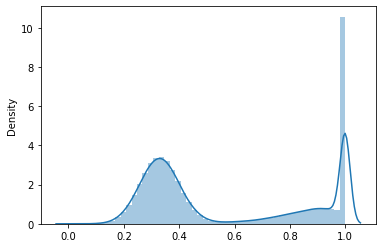

In [374]:
def get_confidence_score(sim_score, min_sim=0.57, max_sim=2.68, min_confidence=0.01):
    sim_score = min(max(sim_score, min_sim), max_sim)
    confidence_score = (-sim_score + max_sim) * (1 - min_confidence) / (max_sim - min_sim) + min_confidence
    return confidence_score              

s = [get_confidence_score(cons['score'][i]) for i in range(len(cons))]

sns.distplot(s)

In [ ]:
get_confidence_score()

In [97]:
np.percentile(np.array(s),0.01)

0.2485932242727564

In [278]:
true_result = true_pairs['score'].describe()
false_result = false_pairs['score'].describe()


In [279]:
s = np.array(true_pairs['score'])
f = np.array(false_pairs['score'])

In [308]:
np.percentile(s, 95)

1.239535539242974

In [195]:
np.percentile(f, 99)

2.3390257913629497

In [196]:
true_result

count    485894.000000
mean          0.612196
std           0.351245
min           0.001798
25%           0.311172
50%           0.574578
75%           0.860069
max           1.994383
Name: score, dtype: float64

In [197]:
false_result

count    743684.000000
mean          1.996809
std           0.150527
min           1.224084
25%           1.897079
50%           1.998287
75%           2.098756
max           2.688060
Name: score, dtype: float64

In [65]:
len(true_pairs[true_pairs['score'] >= 1.2])

34809

In [66]:
1 - 34809/509102

0.9316266681333014

In [188]:
get_confidence_score(1.8)

0.4042081447963801

In [242]:
fdf = pd.read_csv('/mnt/HDD/home-users/trambtn/new_embedd/faceid_id_score_2.txt', sep = ',')
fdf = fdf[~fdf['fid_1'].isin(drop)][~fdf['fid_2'].isin(drop)].reset_index(drop = True)
fdf['score'] = fdf['score'].apply(lambda x: float(x))

ftrue_pairs = fdf[fdf['fid_1'] == fdf['fid_2']][fdf['score'] != 0].reset_index(drop = True)
ffalse_pairs = fdf[fdf['fid_1'] != fdf['fid_2']]

ffalse_pairs = ffalse_pairs.iloc[:,:10000]

fcons = pd.concat([ftrue_pairs, ffalse_pairs], ignore_index=True)

<ipython-input-242-f9420bc9d482>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf = fdf[~fdf['fid_1'].isin(drop)][~fdf['fid_2'].isin(drop)].reset_index(drop = True)
<ipython-input-242-f9420bc9d482>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ftrue_pairs = fdf[fdf['fid_1'] == fdf['fid_2']][fdf['score'] != 0].reset_index(drop = True)


In [352]:
def get_confidence_score(sim_score, min_sim=0.57, max_sim=2.68, min_confidence=0.01):
    sim_score = min(max(sim_score, min_sim), max_sim)
    confidence_score = (-sim_score + max_sim) * (1 - min_confidence) / (max_sim - min_sim) + min_confidence
    return confidence_score   
def get_confidence_score_2(sim_score, min_sim=0.4, max_sim=2.83, min_confidence=0.01):
    sim_score = min(max(sim_score, min_sim), max_sim)
    confidence_score = (-sim_score + max_sim) * (1 - min_confidence) / (max_sim - min_sim) + min_confidence
    return confidence_score   

In [383]:
cons['p1'] = cons['score'].apply(lambda x: get_confidence_score(x))
cons['p2'] = cons['score'].apply(lambda x: get_confidence_score_2(x))
cons['p3'] = fcons['score'].apply(lambda x: get_confidence_score(x))
cons['p4'] = fcons['score'].apply(lambda x: get_confidence_score_2(x))

In [384]:
cons.plot(y = ['p1','p2','p3','p4'], kind = 'kde')

<AxesSubplot:ylabel='Density'>

In [372]:
len(cons[cons['fid_1'] == cons['fid_2']])

485894

In [517]:
ccons = cons[cons['p1']<0.53][cons['fid_1'] == cons['fid_2']]

<ipython-input-517-543e9cba3424>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ccons = cons[cons['p4']<0.53][cons['fid_1'] != cons['fid_2']]


In [518]:
len(ccons)

727258

In [339]:
len(ccons[ccons['p']<0.55])

223

In [531]:
(13714/743684)*100

1.844062800867035

In [524]:
100 - 0.004 - 0.029 - 0.32

99.647

In [474]:
100 - 90.3 -4 -2.8

2.900000000000003

In [535]:
99.64 + 0.09

99.73

In [296]:
min(ccons[ccons['p'] <0.65]['p'])

0.3882031788699744

<AxesSubplot:ylabel='Density'>

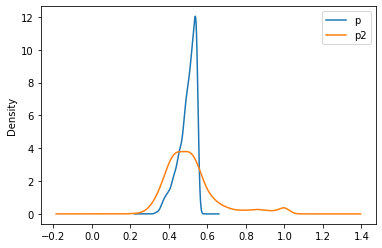

In [373]:
ccons.plot(y = ['p','p2'], kind = 'kde')

In [425]:
2.68-0.57

2.1100000000000003

In [430]:
def cal_sim(score, max_sim = 2.68, min_sim = 0.57, min_confidence = 0.01):
    sim_score = max_sim - (score - min_confidence)*(max_sim - min_sim)/(1-min_confidence)
    return sim_score

In [476]:
cal_sim(0.53)

1.5717171717171716